In [53]:
import os
import itertools
import glob
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker
import matplotlib.pyplot as plt


sns.set(font_scale=0.9, style='whitegrid', font='CMU Sans Serif')
pal = sns.color_palette(['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB'])
sns.set_palette(pal)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

In [54]:
# parse and clean up data
experiments = [
    {
        "file": "./cbf.out",
        "name": "Content-based Filtering",
        "in": "unfiltered",
        "out": "filtered",
    },
    {
        "file": "./condense.out",
        "name": "Message Transformation",
        "in": "raw",
        "out": "processed",
    },
    {
        "file": "./transform.out",
        "name": "Data De-duplication",
        "in": "raw",
        "out": "processed",
    },
]

for e in experiments:
    with open(f"./{e['file']}.csv", "w") as outfile:
        outfile.write("topic,time_ns\n")
        with open(e["file"]) as infile:
            # iterate through the lines
            # look for a line along "Time for topic Topic(topic=unfiltered) difference: 1280875"
            # see if the topic is the in or out topic
            # write down the time
            lines = infile.readlines()
            for line in lines:
                if "Time for topic Topic(topic=" in line:
                    topic = line.split("Time for topic Topic(topic=")[1].split(")")[0]
                    time = line.split("difference: ")[1].split(" ")[0]
                    if topic == e["in"]:
                        outfile.write(f"Baseline,{time}")
                    elif topic == e["out"]:
                        outfile.write(f"Lotus,{time}")

In [55]:
dfs = []
for e in experiments:
    df = pd.read_csv(f"./{e['file']}.csv")
    df["experiment"] = e["name"]
    dfs.append(df)

df = pd.concat(dfs)
df.reset_index(inplace=True, drop=True)
# make a ms column
df["time_ms"] = df["time_ns"] / 1000000

webf NOT subset; don't know how to subset; dropped


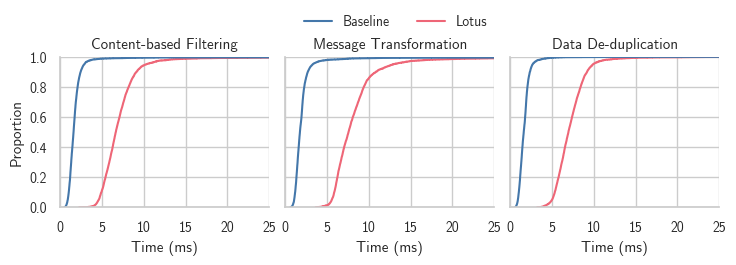

In [56]:
# make a few graphs!
# figure size is 4.5 x 2 per plot
# 3 plots per row
g = sns.displot(data=df, x="time_ms", hue="topic", kind="ecdf", col="experiment", col_wrap=3, height=2.5, aspect=1)
g.set_titles("{col_name}")
# make legend outside and horizontal, no title
sns.move_legend(g, loc='upper center', bbox_to_anchor=(0.475, 1.075, 0, 0), ncol=2, title=None)

g.set_xlabels("Time (ms)")
# make 25 the xlim
g.set(xlim=(0, 25))

g.savefig("cdf.pdf", bbox_inches='tight')